# Analysis Package for Athena

## Notebook Set Up

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py

%cd ~/code/athena/vis/python/

import athena_read

#data_dir = "/home/vikrammanikantan/code/runs/TOR128/"
data_dir = "/Users/vik/code/runs/FM_2D_1/"
data_dir2 = "/Users/vik/code/runs/PL_1/"


/Users/vik/code/athena/vis/python


## Loading Simulation Data

### Choose Time

In [49]:
dump = '00001'

file_user = "fm_torus.user." + dump + ".athdf"
file_prim = "fm_torus.prim." + dump + ".athdf"

### Read in Data

In [50]:
dump = '00001'

file_user = "fm_torus.user." + dump + ".athdf"
file_prim = "fm_torus.prim." + dump + ".athdf"

user1 = athena_read.athdf(data_dir+file_user)
prim1 = athena_read.athdf(data_dir+file_prim)



dump = '09999'

file_user = "fm_torus.user." + dump + ".athdf"
file_prim = "fm_torus.prim." + dump + ".athdf"

user12 = athena_read.athdf(data_dir+file_user)
prim12 = athena_read.athdf(data_dir+file_prim)
#hst = athena_read.hst(data_dir+'fm_torus.hst')

In [ ]:
## second simulation just late time

dump = '09999'

file_user = "fm_torus.user." + dump + ".athdf"
file_prim = "fm_torus.prim." + dump + ".athdf"

user2 = athena_read.athdf(data_dir2+file_user)
prim2 = athena_read.athdf(data_dir2+file_prim)

## Data Reduction

In [51]:
def dump_keys(d, lvl=0):
    import collections.abc
    for k in d.keys():
        if not isinstance(d[k], dict):
            if isinstance(d[k], np.ndarray):
                print(k + ": " + str(type(d[k])) + str(d[k].shape))
            else:
                print(k + ": " + str(type(d[k])))
                
        else:
            dump_keys(d[k])
    return

## Defining the Variables and Coordinates

In [52]:
a = 0
M = 1
q = 0
rh = M + np.sqrt(M**2 - a**2 - q**2)

In [ ]:
xf = prim1['x1f']
xv = prim1['x1v']
yf = prim1['x2f']
yv = prim1['x2v']
zf = prim1['x3f']

### Defining Coordinates

In [42]:
# defining number of cells in each spatial coordinate
n1 = user1['RootGridSize'][0]
n2 = user1['RootGridSize'][1]
n3 = user1['RootGridSize'][2]

# creating 1D arrays fo r
r_  = prim1['x1v']
th_ = prim1['x2v']
ph_ = prim1['x3v']

r = np.zeros((n3,n2,n1))
th = np.zeros((n3,n2,n1))
ph = np.zeros((n3,n2,n1))

rmax = r_[-1]
rmin = r_[0]

for j in range(n2):
    for k in range(n3):
        r[k,j,:] = r_
        
for i in range(n1):
    for k in range(n3):
        th[k,:,i] = th_     

for i in range(n1):
    for j in range(n2):
        ph[:,j,i] = ph_

x = r[0,:,:]*np.sin(th[0,:,:])
z = r[0,:,:]*np.cos(th[0,:,:])

## Plotting

### Contour Plots

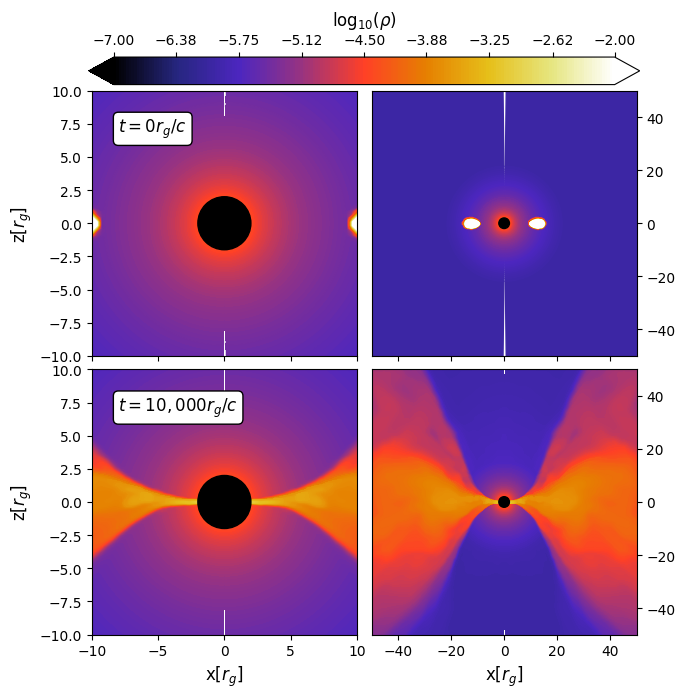

In [70]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl

mpl.rcParams['xtick.direction'] = "out"
mpl.rcParams['ytick.direction'] = "out"

cmap = 'CMRmap'
clr = 'white'

rows = 2
cols = 2

density_floor = 10**-3.5

rho1 = prim1['rho']
rho2 = prim12['rho']

q1 = np.log10(rho1)
q2 = np.log10(rho2)

qs = [q1, q2]

fmin = np.log10(1e-7)
fmax = np.log10(1e-2)
levels = np.linspace(fmin,fmax,200)
cb_ticks = np.round_(np.linspace(fmin,fmax, 9),decimals = 2)

p1 = 10
p2 = 50

width = 3.5

fig, axs = plt.subplots(rows,cols, figsize=(cols*width,rows*width), sharex = 'col')#,gridspec_kw={'height_ratios': [3, 2]})


for i in range(rows):
    for j in range(cols):
        CS1 = axs[i,j].contourf(x, z, qs[i][0,:,:], levels=levels, extend = 'both', cmap = cmap)
        for c in CS1.collections:
            c.set_edgecolor("face")
        CS2 = axs[i,j].contourf(-x, z, qs[i][0,:,:], levels=levels, extend = 'both', cmap = cmap)
        for c in CS2.collections:
            c.set_edgecolor("face")
        #axs[i,j].contour(x, y, qs[i][:,:,0], [0.00001], color = clr)
        #axs[i,j].contour(-x, y, qs[i][:,:,0], [0.00001], color = clr)
        
        axs[i,j].set_aspect('equal')
        circle = plt.Circle((0, 0), rh, color ='black')
        axs[i,j].add_patch(circle)
    
    axs[i,1].set_xlim(-p2, p2)
    axs[i,1].yaxis.set_ticks_position('right')
    axs[i,1].set_ylim(-p2, p2)
        
    axs[i,0].set_xlim(-p1, p1)
    axs[i,0].set_ylim(-p1, p1)
    axs[i,0].set_ylabel(r'z[$r_g$]', fontsize='large')
        
axs[1,0].set_xlabel(r'x[$r_g$]', fontsize='large')
axs[1,1].set_xlabel(r'x[$r_g$]', fontsize='large')

axs[0,0].text(-8,8,r"$ t = 0 r_g / c$",bbox=dict(boxstyle="round", fc="w", ec="k"),
        size="large", color="black",horizontalalignment="left", verticalalignment="top")

axs[1,0].text(-8,8,r"$ t = 10,000 r_g / c$",bbox=dict(boxstyle="round", fc="w", ec="k"),
        size="large", color="black",horizontalalignment="left", verticalalignment="top")

#axs[2,0].text(-95,95,"(3) Penna et al.",bbox=dict(boxstyle="round", fc="w", ec="k"),
#        size="large", color="black",horizontalalignment="left", verticalalignment="top")

plt.tight_layout(h_pad = 0.1, w_pad = 0.1)

cbar = fig.colorbar(CS1, location = 'top', ax = axs, shrink = 1, pad = 0.01, fraction = 0.1)
cbar.ax.set_title(r'$\log_{10}(\rho)$')
cbar.set_ticks(cb_ticks)

plt.savefig("./fm_density.png", format="png", dpi=250)

### mass accretion rate plots

In [77]:
dump_keys(prim2)

vr = prim1['vel3']
vr2 = prim2['vel3']
rho22 = prim2['rho']

Coordinates: <class 'numpy.bytes_'>
DatasetNames: <class 'numpy.ndarray'>(2,)
MaxLevel: <class 'numpy.int32'>
MeshBlockSize: <class 'numpy.ndarray'>(3,)
NumCycles: <class 'numpy.int32'>
NumMeshBlocks: <class 'numpy.int32'>
NumVariables: <class 'numpy.ndarray'>(2,)
RootGridSize: <class 'numpy.ndarray'>(3,)
RootGridX1: <class 'numpy.ndarray'>(3,)
RootGridX2: <class 'numpy.ndarray'>(3,)
RootGridX3: <class 'numpy.ndarray'>(3,)
Time: <class 'numpy.float32'>
VariableNames: <class 'numpy.ndarray'>(8,)
x1f: <class 'numpy.ndarray'>(129,)
x1v: <class 'numpy.ndarray'>(128,)
x2f: <class 'numpy.ndarray'>(129,)
x2v: <class 'numpy.ndarray'>(128,)
x3f: <class 'numpy.ndarray'>(2,)
x3v: <class 'numpy.ndarray'>(1,)
rho: <class 'numpy.ndarray'>(1, 128, 128)
press: <class 'numpy.ndarray'>(1, 128, 128)
vel1: <class 'numpy.ndarray'>(1, 128, 128)
vel2: <class 'numpy.ndarray'>(1, 128, 128)
vel3: <class 'numpy.ndarray'>(1, 128, 128)
Bcc1: <class 'numpy.ndarray'>(1, 128, 128)
Bcc2: <class 'numpy.ndarray'>(1, 128

In [96]:
dump_keys(user2)

Coordinates: <class 'numpy.bytes_'>
DatasetNames: <class 'numpy.ndarray'>(1,)
MaxLevel: <class 'numpy.int32'>
MeshBlockSize: <class 'numpy.ndarray'>(3,)
NumCycles: <class 'numpy.int32'>
NumMeshBlocks: <class 'numpy.int32'>
NumVariables: <class 'numpy.ndarray'>(1,)
RootGridSize: <class 'numpy.ndarray'>(3,)
RootGridX1: <class 'numpy.ndarray'>(3,)
RootGridX2: <class 'numpy.ndarray'>(3,)
RootGridX3: <class 'numpy.ndarray'>(3,)
Time: <class 'numpy.float32'>
VariableNames: <class 'numpy.ndarray'>(2,)
x1f: <class 'numpy.ndarray'>(129,)
x1v: <class 'numpy.ndarray'>(128,)
x2f: <class 'numpy.ndarray'>(129,)
x2v: <class 'numpy.ndarray'>(128,)
x3f: <class 'numpy.ndarray'>(2,)
x3v: <class 'numpy.ndarray'>(1,)
gamma: <class 'numpy.ndarray'>(1, 128, 128)
pmag: <class 'numpy.ndarray'>(1, 128, 128)


In [114]:
mdot1 = (rho2> 1e-6)*rho2*vr
mdot_r = mdot1.mean(-3).mean(-2)

mdot2 = (rho22> 1e-6)*rho22*vr2
mdot_r_2 = mdot2.mean(-3).mean(-2)

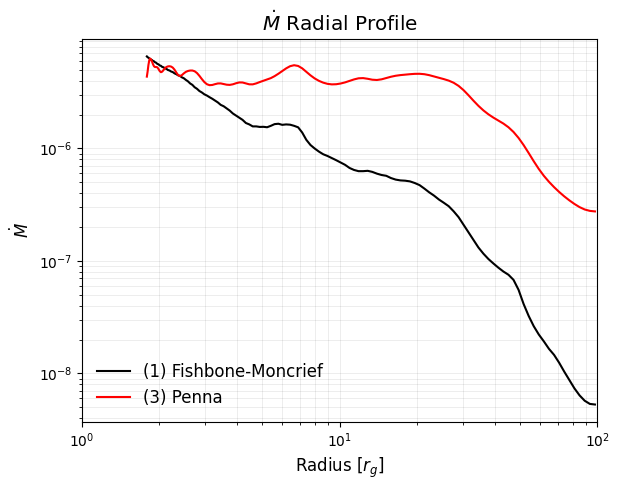

In [120]:
"""
Setting up axes and grid
------------------------
"""

plt.figure(figsize = (6.3,5))

#plt.tick_params(direction='in', grid_color='grey', grid_alpha=0.5, which = 'both')
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha = 0.1, which = 'both')

"""
Plotting the important radii
----------------------------
"""

pos = 1.05
gap = 0.5
ls = (0,(5,10))
lw = 0.8


#plt.axvline(x = rh, color = 'black', linestyle = ls, label = 'r_h', lw = lw)
#plt.text(rh+gap, pos,r'$r_h$',rotation=0, size='large')

"""
plt.axvline(x = rin, color = 'black', linestyle = ls, lw = lw)
plt.text(rin + gap, pos,r'$r_{in}$',rotation=0, size='large')
plt.axvline(x = r1, color = 'black', linestyle = ls, lw = lw)
plt.text(r1 + gap, pos,r'$r_1$',rotation=0, size='large')
plt.axvline(x = r2, color = 'black', linestyle = ls, lw = lw)
plt.text(r2 + gap, pos,r'$r_2$',rotation=0, size='large')
#plt.axvline(x = 1000, color = 'black', linestyle = ls, label = 'rout', , lw = lw)
#plt.text(1000+0.1,pos,r'$r_{out}$',rotation=0, size='large')
"""

"""
Plotting the actual profile
---------------------------
"""

plt.plot(r_, mdot_r, label = '(1) Fishbone-Moncrief', color = 'black')
plt.plot(r_, mdot_r_2, label = '(3) Penna', color = 'red')

"""
Adding labels, limits, and scales
---------------------------------

"""

""" 
x-axis
"""

plt.xlim(1,100)
plt.xscale('log')
plt.xlabel("Radius [$r_g$]", fontsize='large')


"""
y-axis
"""
plt.ylabel(r"$\dot{M}$", fontsize='large')
#plt.ylim(0.1,1.1)
plt.yscale('log')

"""
title
"""
plt.title(r"$\dot{M}$ Radial Profile", fontsize = 'x-large')

"""
Line at 1 - enthalpy must be above 1 within the accretion disk
"""

#plt.plot(r_, np.ones_like(r_), color = 'grey', alpha = 0.5)

plt.legend(frameon = False, fontsize='large', bbox_to_anchor=(0, 0), loc='lower left')

plt.tight_layout()

plt.savefig("/Users/vik/code/runs/MdotProfile.pdf", format = 'pdf')

## Making a Movie (not yet finished)

In [ ]:
a = 0.5
M = 1
q = 0
rh = M + np.sqrt(M**2 - a**2 - q**2)


def mkmovie(sim_path, var, start, end, dir_save):
    
    s1 = f'{start:05d}'
    
    file_user = "fm_torus.user." + s1 + ".athdf"
    file_prim = "fm_torus.prim." + s1 + ".athdf"

    user = athena_read.athdf(data_dir+file_user)
    prim = athena_read.athdf(data_dir+file_prim)
    
    r,th,ph = get_plot_coordinates(sim_path, start)
    
    x = r[0,:,:]*np.sin(th[0,:,:])
    z = r[0,:,:]*np.cos(th[0,:,:])
    
    for dump in range(start, end):
        
        d = f'{dump:05d}'

        file_user = "fm_torus.user." + d + ".athdf"
        file_prim = "fm_torus.prim." + d + ".athdf"

        user = athena_read.athdf(data_dir+file_user)
        prim = athena_read.athdf(data_dir+file_prim)
        
        

In [ ]:
def get_plot_coordinates(sim_path, dump):
    
    d = f'{dump:05d}'
    
    file_user = "fm_torus.user." + d + ".athdf"
    file_prim = "fm_torus.prim." + d + ".athdf"

    user = athena_read.athdf(data_dir+file_user)
    prim = athena_read.athdf(data_dir+file_prim)
    
    xf = prim['x1f']
    xv = prim['x1v']
    yf = prim['x2f']
    yv = prim['x2v']
    zf = prim['x3f']
    
    # defining number of cells in each spatial coordinate
    n1 = user['RootGridSize'][0]
    n2 = user['RootGridSize'][1]
    n3 = user['RootGridSize'][2]

    # creating 1D arrays fo r
    r_  = prim['x1v']
    th_ = prim['x2v']
    ph_ = prim['x3v']

    r = np.zeros((n3,n2,n1))
    th = np.zeros((n3,n2,n1))
    ph = np.zeros((n3,n2,n1))

    rmax = r_[-1]
    rmin = r_[0]

    for j in range(n2):
        for k in range(n3):
            r[k,j,:] = r_

    for i in range(n1):
        for k in range(n3):
            th[k,:,i] = th_     

    for i in range(n1):
        for j in range(n2):
            ph[:,j,i] = ph_

    x = r[0,:,:]*np.sin(th[0,:,:])
    z = r[0,:,:]*np.cos(th[0,:,:])
    
    return r,th,ph